In [1]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import AdaBoostClassifier as AdaC
from sklearn.ensemble import GradientBoostingClassifier as GBC

import numpy as np

from sklearn.datasets import make_blobs, make_gaussian_quantiles

from utils import plot_2d, test_model
from plots import plot_tree_compare
from evaluation import dt_classifier_auc, get_auc_gbc_trees, get_auc_ada_trees

## Dataset Generation ## 

### Decision Trees ###
Advantages:
- Good with High Level Data: e.g. age, income

Disadvantages:
- Bad with Low Level Data: data with many predictors/inputs
- Trees can overfit: Overfitting increases with depth of tree


### Tree Boosting (ADA) ###

- gradient boosting may not be a good choice if you have a lot of noise, as it can result in overfitting
- Boosting is based on weak learners (high bias, low variance). In terms of decision trees, weak learners are shallow trees, sometimes even as small as decision stumps (trees with two leaves). Boosting reduces error mainly by reducing bias (and also to some extent variance, by aggregating the output from many models).

### Decision Trees outperforming Tree Boosting ###

TODO

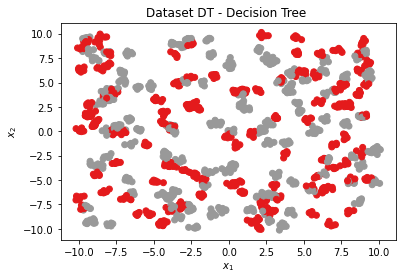

In [2]:
# Generate dataset
def data_dt():

    X, y = make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    y = y % 2 # to reduce the amount of different labels to 2

    return X, y

dt_X, dt_y = data_dt()
plot_2d(dt_X, dt_y, 'Dataset DT - Decision Tree ')

Decision Tree Performance on Dataset DT:
AUC score: 0.849


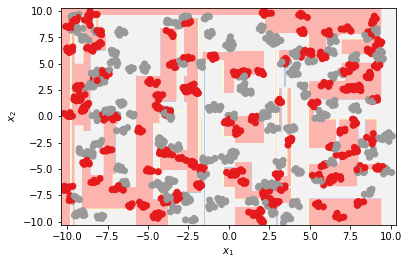

Tree Boosting ADA Performance Dataset DT:
AUC score: 0.642


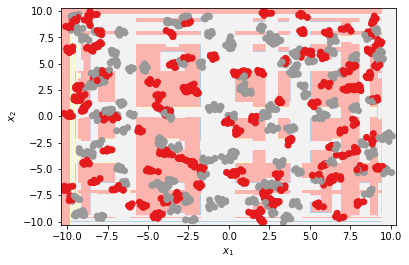

Tree Boosting GBC Performance on Dataset DT:
AUC score: 0.767


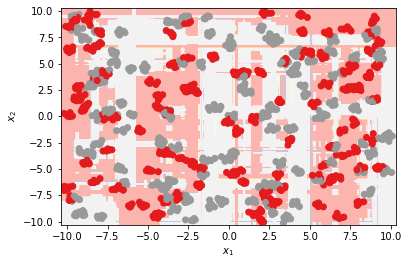

In [3]:
# Decision Trees
print('Decision Tree Performance on Dataset DT:')
dtree=DTC(criterion='entropy', max_depth=35, min_samples_split=2)
test_model(dtree, dt_X, dt_y)
# plot_tree(dtree)

# Tree Boosting - ADA
ada = AdaC(n_estimators=200)
print('Tree Boosting ADA Performance Dataset DT:')
test_model(ada, dt_X, dt_y)

# Tree Boosting - GBC
gbc = GBC(n_estimators=300)
print('Tree Boosting GBC Performance on Dataset DT:')
test_model(gbc, dt_X, dt_y)

Comparison on Decision Tree Dataset:


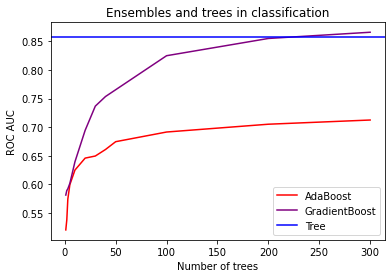

In [5]:
print('Comparison on Decision Tree Dataset:')
ntree=np.array([1, 2, 3, 5, 10, 20, 30, 40, 50, 100, 200, 300])
auc_ada_tree = map(lambda tree: get_auc_ada_trees(tree, dt_X, dt_y), ntree) # ADA AUC per number of trees
auc_gbc_tree = map(lambda tree: get_auc_gbc_trees(tree, dt_X, dt_y), ntree) # GBC AUC per number of trees
auc_tree = dt_classifier_auc(dt_X, dt_y, max_depth=None, min_samples_split=2)
plot_tree_compare(ntree, auc_ada_tree, auc_gbc_tree, auc_tree)

### Tree Boosting outperforming Decision Trees ###

TODO

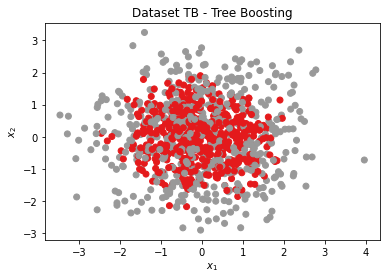

In [6]:
# Generate dataset
def data_tb():

    X, y = make_gaussian_quantiles(
        n_samples=1000,
        n_features=8,
        n_classes=2,
        random_state=42
    )

    return X, y

tb_X, tb_y = data_tb()
plot_2d(tb_X, tb_y, 'Dataset TB - Tree Boosting')

In [7]:
# Decision Trees

print('Decision Tree Performance on Dataset TB:')
dtree=DTC(criterion='entropy', max_depth=20, min_samples_split=20)
test_model(dtree, tb_X, tb_y)
# plot_tree(dtree)

# Tree Boosting ADA
tboost = AdaC(n_estimators=150)
print('Tree Boosting ADA Performance on Dataset TB:')
test_model(tboost, tb_X, tb_y)

AUC score: 0.781
The classifier boundary can't be plotted because the dataset has more than 2 dimensions
Tree Boosting ADA Performance on Dataset TB:
AUC score: 0.906
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


Comparison on Tree Boost Dataset:


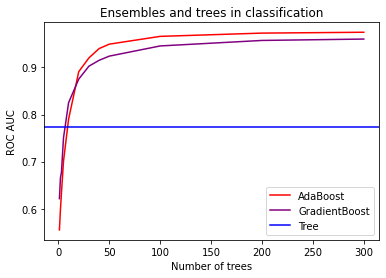

In [10]:
print('Comparison on Tree Boost Dataset:')
ntree=np.array([1, 2, 3, 5, 10, 20, 30, 40, 50, 100, 200, 300])
auc_ada_tree = map(lambda tree: get_auc_ada_trees(tree, tb_X, tb_y), ntree)
auc_gbc_tree = map(lambda tree: get_auc_gbc_trees(tree, tb_X, tb_y), ntree)
auc_tree = dt_classifier_auc(tb_X, tb_y, max_depth=None, min_samples_split=20)

plot_tree_compare(ntree, auc_ada_tree, auc_gbc_tree, auc_tree)